In [10]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')

## Difference Between Tensor and Python Variable

In [6]:
var = 1.
print("python variable: ", var)
print()

var_tensor = tf.constant(1.)
print("tensor: ", var_tensor)

python variable:  1.0

tensor:  Tensor("Const_2:0", shape=(), dtype=float32)


In [5]:
with tf.Session() as sess:
    print("透過tensorflow session取得tensor value: ", sess.run(var_tensor))

透過tensorflow session取得tensor value:  1.0


<br/>
<br/>
<br/>
## Simple Regression Example
- Formula: $ Y = 0.5X + 0.3 $

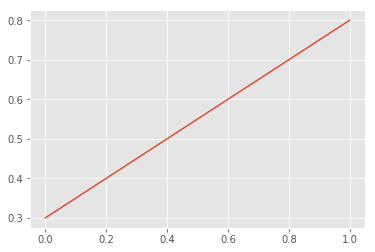

In [71]:
formula = lambda x: 0.5 * x + 0.3
data_x = np.linspace(0, 1, 100)
plt.plot(data_x, formula(data_x)) # np.random.normal(0., 0.01, len(data_x)), linewidths=1
plt.show()

In [74]:
import tensorflow as tf, numpy as np

n_epoch = 200
learning_rate = 0.5

outerX = np.random.random(10000)
outerY = 0.5 * outerX + 0.3
outerX, outerY

tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    with tf.variable_scope("inputs"):
        # 接收 outerX data
        placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
        # 接收 outerY data
        placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")
        
    with tf.variable_scope("formula"):
        varW = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_w")
        varB = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_b")
        # 公式 0.5X + 0.3, 期望varW會慢慢逼近5, varB會慢慢逼近0.3
        varY = varW * placeholderX + varB
        # tensorboard weights logs
        tf.summary.histogram("varW", varW)
        tf.summary.histogram("varB", varB)
    # mean square error
    loss = tf.losses.mean_squared_error(placeholderY, varY)
    # tensorboard weights logs
    tf.summary.scalar("loss", loss)
    # 使用 GradientDescentOptimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
    trainer = optimizer.minimize(loss)
    merge = tf.summary.merge_all()
    
    with tf.Session(graph=g) as sess:
        w = tf.summary.FileWriter("./model/linear", sess.graph)
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(n_epoch):
            _, w_, b_ = sess.run([trainer, varW, varB], feed_dict={placeholderX: outerX, placeholderY: outerY})
            print('step: {} varW: {}, varB: {}'.format(i, w_, b_) )
            if (i + 1) % 10 == 0:
                merge_ = sess.run(merge, feed_dict={placeholderX: outerX, placeholderY: outerY})
                w.add_summary(merge_, i)

step: 0 varW: [ 0.60034275], varB: [ 0.4250809]
step: 1 varW: [ 0.50425625], varB: [ 0.24985176]
step: 2 varW: [ 0.52789468], varB: [ 0.29787284]
step: 3 varW: [ 0.51962411], varB: [ 0.28605908]
step: 4 varW: [ 0.52002507], varB: [ 0.29019246]
step: 5 varW: [ 0.51822615], varB: [ 0.28999206]
step: 6 varW: [ 0.5171293], varB: [ 0.29089114]
step: 7 varW: [ 0.51595014], varB: [ 0.29143929]
step: 8 varW: [ 0.51489156], varB: [ 0.29202861]
step: 9 varW: [ 0.51389265], varB: [ 0.29255766]
step: 10 varW: [ 0.51296359], varB: [ 0.29305688]
step: 11 varW: [ 0.51209593], varB: [ 0.2935212]
step: 12 varW: [ 0.5112865], varB: [ 0.29395482]
step: 13 varW: [ 0.51053119], varB: [ 0.29435936]
step: 14 varW: [ 0.50982642], varB: [ 0.29473683]
step: 15 varW: [ 0.50916886], varB: [ 0.29508907]
step: 16 varW: [ 0.50855529], varB: [ 0.2954177]
step: 17 varW: [ 0.50798279], varB: [ 0.29572433]
step: 18 varW: [ 0.50744855], varB: [ 0.29601043]
step: 19 varW: [ 0.50695014], varB: [ 0.29627743]
step: 20 varW: 

step: 172 varW: [ 0.50000024], varB: [ 0.29999989]
step: 173 varW: [ 0.50000024], varB: [ 0.29999989]
step: 174 varW: [ 0.50000024], varB: [ 0.29999989]
step: 175 varW: [ 0.50000024], varB: [ 0.29999989]
step: 176 varW: [ 0.50000024], varB: [ 0.29999989]
step: 177 varW: [ 0.50000024], varB: [ 0.29999989]
step: 178 varW: [ 0.50000024], varB: [ 0.29999989]
step: 179 varW: [ 0.50000024], varB: [ 0.29999989]
step: 180 varW: [ 0.50000024], varB: [ 0.29999989]
step: 181 varW: [ 0.50000024], varB: [ 0.29999989]
step: 182 varW: [ 0.50000024], varB: [ 0.29999989]
step: 183 varW: [ 0.50000024], varB: [ 0.29999989]
step: 184 varW: [ 0.50000024], varB: [ 0.29999989]
step: 185 varW: [ 0.50000024], varB: [ 0.29999989]
step: 186 varW: [ 0.50000024], varB: [ 0.29999989]
step: 187 varW: [ 0.50000024], varB: [ 0.29999989]
step: 188 varW: [ 0.50000024], varB: [ 0.29999989]
step: 189 varW: [ 0.50000024], varB: [ 0.29999989]
step: 190 varW: [ 0.50000024], varB: [ 0.29999989]
step: 191 varW: [ 0.50000024], 

<br/>
<br/>
<br/>
<br/>
<br/>
## Model Save and Load

In [73]:
import tensorflow as tf, numpy as np

class LinearModel(object):
    def __init__(self):
        """Init graph"""
        tf.reset_default_graph()
        self.graph = tf.Graph()
        with self.graph.as_default():
            with tf.variable_scope("inputs"):
                # 接收 outerX data
                self.placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
                # 接收 outerY data
                self.placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")

            with tf.variable_scope("formula"):
                self.varW = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_w")
                self.varB = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_b")
                self.varY = self.varW * self.placeholderX + self.varB
                # tensorboard weights logs
                tf.summary.histogram("varW", varW)
                tf.summary.histogram("varB", varB)
            # 均方誤差
            self.loss = tf.losses.mean_squared_error(self.placeholderY, self.varY)
            # tensorboard weights logs
            tf.summary.scalar("loss", self.loss)
            # 使用 AdamOptimizer
            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
            self.trainer = self.optimizer.minimize(self.loss)
            self.merge = tf.summary.merge_all()
            # 儲存物件
            self.saver = tf.train.Saver(tf.global_variables())
            
    def load_weight(self, sess, model_dir):
        """load latest saved model"""
        latestCkpt = tf.train.latest_checkpoint(model_dir)
        if latestCkpt:
            self.saver.restore(sess, latestCkpt)
            print("load weight success!")
        return latestCkpt

## Save Model

In [75]:
n_epoch = 200
learning_rate = 0.01

outerX = np.random.random(10000)
outerY = 0.5 * outerX + 0.3
outerX, outerY

model_dir = "./model/linear"

model = LinearModel()
with tf.Session(graph=model.graph) as sess:
    w = tf.summary.FileWriter(model_dir, sess.graph)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(n_epoch):
        _, w_, b_ = sess.run([model.trainer, model.varW, model.varB], feed_dict={model.placeholderX: outerX, model.placeholderY: outerY})
        print('step: {} varW: {}, varB: {}'.format(i, w_, b_) )
        if (i + 1) % 10 == 0:
            merge_ = sess.run(model.merge, feed_dict={model.placeholderX: outerX, model.placeholderY: outerY})
            w.add_summary(merge_, i)
            
        if (i + 1) % 10 == 0:
            ''' Save model '''
            model.saver.save(sess, save_path=model_dir + "/linear_model", global_step=i)

step: 0 varW: [ 0.25453639], varB: [ 0.37469816]
step: 1 varW: [ 0.26453635], varB: [ 0.38469812]
step: 2 varW: [ 0.27442995], varB: [ 0.39443666]
step: 3 varW: [ 0.28410631], varB: [ 0.40353727]
step: 4 varW: [ 0.29341981], varB: [ 0.41139412]
step: 5 varW: [ 0.30220047], varB: [ 0.41726547]
step: 6 varW: [ 0.31028554], varB: [ 0.42063025]
step: 7 varW: [ 0.31756034], varB: [ 0.42147842]
step: 8 varW: [ 0.32398373], varB: [ 0.42018145]
step: 9 varW: [ 0.32958841], varB: [ 0.41720867]
step: 10 varW: [ 0.33446613], varB: [ 0.41297796]
step: 11 varW: [ 0.33874884], varB: [ 0.40782773]
step: 12 varW: [ 0.34259224], varB: [ 0.40203276]
step: 13 varW: [ 0.34616256], varB: [ 0.3958261]
step: 14 varW: [ 0.34962547], varB: [ 0.38941613]
step: 15 varW: [ 0.35313633], varB: [ 0.38299659]
step: 16 varW: [ 0.35683078], varB: [ 0.37674958]
step: 17 varW: [ 0.36081678], varB: [ 0.37084222]
step: 18 varW: [ 0.36516899], varB: [ 0.36541849]
step: 19 varW: [ 0.3699269], varB: [ 0.36058885]
step: 20 var

step: 170 varW: [ 0.5000146], varB: [ 0.29999769]
step: 171 varW: [ 0.50000972], varB: [ 0.30000031]
step: 172 varW: [ 0.50000471], varB: [ 0.30000204]
step: 173 varW: [ 0.49999973], varB: [ 0.30000302]
step: 174 varW: [ 0.49999499], varB: [ 0.30000353]
step: 175 varW: [ 0.4999907], varB: [ 0.30000386]
step: 176 varW: [ 0.49998704], varB: [ 0.30000427]
step: 177 varW: [ 0.49998412], varB: [ 0.30000493]
step: 178 varW: [ 0.49998197], varB: [ 0.30000591]
step: 179 varW: [ 0.49998057], varB: [ 0.30000719]
step: 180 varW: [ 0.49997979], varB: [ 0.30000868]
step: 181 varW: [ 0.49997953], varB: [ 0.30001023]
step: 182 varW: [ 0.49997959], varB: [ 0.30001163]
step: 183 varW: [ 0.49997979], varB: [ 0.30001271]
step: 184 varW: [ 0.49998006], varB: [ 0.30001333]
step: 185 varW: [ 0.4999803], varB: [ 0.30001345]
step: 186 varW: [ 0.49998048], varB: [ 0.30001307]
step: 187 varW: [ 0.49998066], varB: [ 0.30001229]
step: 188 varW: [ 0.49998087], varB: [ 0.30001125]
step: 189 varW: [ 0.49998119], var

## Load Model

INFO:tensorflow:Restoring parameters from ./model/linear\linear_model-199


INFO:tensorflow:Restoring parameters from ./model/linear\linear_model-199


load weight success!


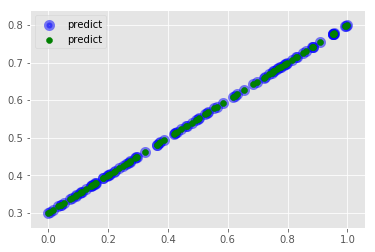

In [83]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

model_dir = "./model/linear"
data_x = np.random.random(100)

model = LinearModel()
with tf.Session(graph=model.graph) as sess:
    sess.run(tf.global_variables_initializer())
    ''' load pre-trained weight into model '''
    model.load_weight(sess, model_dir)
    
    y = sess.run(model.varY, feed_dict={model.placeholderX: data_x})
    
    ans_y = lambda x: 0.5 * x + 0.3
    plt.scatter(data_x, y, label="predict", c="b", linewidth=5, alpha=0.5)
    plt.scatter(data_x, ans_y(data_x), label="predict", c="g")
    plt.legend(loc="best")
    plt.show()

## Observations
1. 上圖可知, 預測的答案跟實際答案是重疊的